#### Custom pipeline components

Now that you know how spaCy's pipeline works, let's take a look at another very powerful feature: custom pipeline components.

Custom pipeline components let you add your own function to the spaCy pipeline that is executed when you call the nlp object on a text – for example, to modify the doc and add more data to it.

#### Why custom components?

After the text is tokenized and a Doc object has been created, pipeline components are applied in order. spaCy supports a range of built-in components, but also lets you define your own.

Custom components are executed automatically when you call the nlp object on a text.

They're especially useful for adding your own custom metadata to documents and tokens.

You can also use them to update built-in attributes, like the named entity spans.

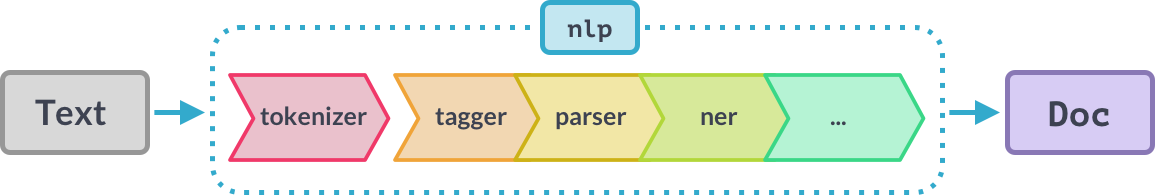

- Make a function execute automatically when you call nlp
- Add your own metadata to documents and tokens
- Updating built-in attributes like doc.ents

#### Anatomy of a component

Fundamentally, a pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

To tell spaCy where to find your custom component and how it should be called, you can decorate it using the @Language.component decorator. Just add it to the line right above the function definition.

Once a component is registered, it can be added to the pipeline using the nlp.add_pipe method. The method takes at least one argument: the string name of the component.

- Function that takes a doc, modifies it and returns it
- Registered using the Language.component decorator
- Can be added using the nlp.add_pipe method

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

To specify where to add the component in the pipeline, you can use the following keyword arguments:

- Setting last to True will add the component last in the pipeline. This is the default behavior.

- Setting first to True will add the component first in the pipeline, right after the tokenizer.

- The before and after arguments let you define the name of an existing component to add the new component before or after. For example, before="ner" will add it before the named entity recognizer.

- The other component to add the new component before or after needs to exist, though – otherwise, spaCy will raise an error.

|Argument|Description|Example|
|-|-|-|
|last|If True, add last|nlp.add_pipe("component", last=True)|
|first|If True, add first|nlp.add_pipe("component", first=True)|
|before|Add before component|nlp.add_pipe("component", before="ner")|
|after|Add after component|nlp.add_pipe("component", after="tagger")|

#### Example: a simple component

Here's an example of a simple pipeline component.

We start off with the small English pipeline.

We then define the component – a function that takes a Doc object and returns it.

Let's do something simple and print the length of the doc that passes through the pipeline.

Don't forget to return the doc so it can be processed by the next component in the pipeline! The doc created by the tokenizer is passed through all components, so it's important that they all return the modified doc.

To tell spaCy about the new component, we register it using the @Language.component decorator and call it "custom_component".

We can now add the component to the pipeline. Let's add it to the very beginning right after the tokenizer by setting first=True.

When we print the pipeline component names, the custom component now shows up at the start. This means it will be applied first when we process a doc.

In [2]:
import spacy
from spacy.language import Language

# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Now when we process a text using the nlp object, the custom component will be applied to the doc and the length of the document will be printed.

In [9]:
# Process a text
doc = nlp("Hello world!")
list(doc)

Doc length: 3


[Hello, world, !]